# <center> Артиков Артур. EDA-4 Статистические тесты. Практическое задание

## Постановка задачи

HR-агентство изучает тренды на рынке труда в IT. Компания хочет провести исследование на основе данных о зарплатах в сфере Data Science за 2020–2022 годы и получить некоторые выводы.

[Исходные данные](https://lms-cdn.skillfactory.ru/assets/courseware/v1/9e84f30c5bc84881a5e33262d5e32a8b/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/ds_salaries.zip)

Моя задача: исследовать данные и сделать выводы по полученным результатам, а также подкрепить свои рассуждения и выводы визуализациями и с помощью статистического тестирования проверить, являются ли выводы статистически значимыми.

В процессе анализа необходимо:

1. Выяснить, какие факторы влияют на зарплату специалиста Data Scientist.
2. А также ответить на ключевые вопросы HR-агентства:
  * Наблюдается ли ежегодный рост зарплат у специалистов Data Scientist?
  * Как соотносятся зарплаты Data Scientist и Data Engineer в 2022 году?
  * Как соотносятся зарплаты специалистов Data Scientist в компаниях различных размеров?
  * Есть ли связь между наличием должностей Data Scientist и Data Engineer и размером компании?

Для статистических тестов мы будем использовать уровень значимости  $\alpha=0.05$.

### Информация о столбцах датасета

_1. work_year_ - год, в котором была выплачена зарплата.|

_2. experience_level_ - опыт работы на этой должности в течение года со следующими возможными значениями:
  * EN — Entry-level/Junior;
  * MI — Mid-level/Intermediate;
  * SE — Senior-level/Expert;
  * EX — Executive-level/Director.

_3. employment_type_ - тип трудоустройства для этой роли:
  * PT — неполный рабочий день;
  * FT — полный рабочий день;
  * CT — контракт;
  * FL — фриланс.

_4. job_title_ - роль, в которой соискатель работал в течение года.

_5. salary_ - общая выплаченная валовая сумма заработной платы.

_6. salary_currency_ - валюта выплачиваемой заработной платы в виде кода валюты ISO 4217.

_7. salary_in_usd_ - зарплата в долларах США (валютный курс, делённый на среднее значение курса доллара США за соответствующий год через fxdata.foorilla.com).

_8. employee_residence_ - основная страна проживания сотрудника в течение рабочего года в виде кода страны ISO 3166.

_9. remote_ratio_ - общий объём работы, выполняемой удалённо.
  Возможные значения:
  * 0 — удалённой работы нет (менее 20 %);
  * 50 — частично удалённая работа;
  * 100 — полностью удалённая работа (более 80 %).

_10. company_location_ - страна главного офиса работодателя или филиала по контракту в виде кода страны ISO 3166.

_11. company_size_ - среднее количество людей, работавших в компании в течение года:
  * S — менее 50 сотрудников (небольшая компания);
  * M — от 50 до 250 сотрудников (средняя компания);
  * L — более 250 сотрудников (крупная компания).


### Шаги для выполнения анализа

Для успешной реализации анализа, необходимо выполнить следующие шаги:

1. Загрузка и обработка данных
2. Разведывательный анализ данных
  1. Визуальный анализ данных
  2. Статистический анализ данных
3. Соответствие выводов бизнес-вопросам (ответ на 4 бизнес-вопроса)
4. Дополнительное исследование
5. Оформление исследования

## Шаг 1. Загрузка и обработка данных

### Произведем загрузку данных

In [2]:
# Загружаем необходимые библиотеки для считывания данных, анализа и визуализации

import pandas as pd
import numpy as np

from scipy import stats
import statsmodels.api as sm
from statsmodels import stats as sms

from matplotlib import pyplot as plt
import seaborn as sns

# Настраиваем вывод наших графиков
sns.set_theme("notebook")
sns.set_palette("pastel")

In [3]:
from google.colab import files
uploaded = files.upload()

Saving ds_salaries.csv to ds_salaries.csv


In [4]:
# Загрузим наш датасет и выведем первые несколько строчек, чтобы понять что он считался верно
data = pd.read_csv('ds_salaries.csv')
display(data.head())

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [5]:
# Зададим наш уровень знаимости
alpha = 0.05
print("Уровень значимости alpha = {:.2f}".format(alpha))

Уровень значимости alpha = 0.05


### Проведем первичный анализ и обработку данных


In [6]:
# Выведем информацию о данных
display(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


None

Как видно из информации о датасете, всего представлено 607 записей, при этом пропусков не обнаружено. Теперь узнаем, есть ли в датасете дубликаты.

In [7]:
print("Общее число дубликатов: {}".format(data[data.duplicated()].shape[0]))

data = data.drop_duplicates()
print('Количество записей, после удаления дубликатов: {}'.format(data.shape[0]))

Общее число дубликатов: 0
Количество записей, после удаления дубликатов: 607


В данных отсутствуют дубликаты. Тем не менее, после дополнительного удаления дубликатов (сделанного на случай ошибки), количество записей не изменилось, ч.т.д.

Теперь проанализируем, есть ли столбцы с некорректным типом данных.

Столбцы Unnamed_0, work_year, salary, salaty_in_usd, remote_ratio - содержат числовые значения, значит тип данных в этих столбцах должен быть int либо float. В соответствии с информацией о датасете тип данных этих столбцов - int64, то есть столбцы обладают верным типом данных.

Столбцы experience_level, 	employment_type, job_title, salary_currency, employee_residence, company_location, company_size - содержат текстовые данные, следовательно тип данных этих столбцов должен быть object, что соответствует истине.



In [8]:
# Выведем информацию о данных
display(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 61.6+ KB


None

Снова посмотрим на столбцы признаков и найдем те, которые не несут полезной для анализа информации.

__Unnamed: 0__ - этот столбец просто дублирует индекс элемента, следовательно он не является информативным.

__salary__ и __salary_currency__ - зарплата и код валюты зарплаты, для перевода в доллары, также являются неинформативными, поскольку у нас есть столбец __salary_in_usd__ - содержащий зарплату в долларах, что более приемлимо для анализа, поскольку нас интересует не зарплата в конкретном регионе, а общие данные о зарплатах специалистов Data Science

__employee_residence__ - страна проживания работника в течение года работы, также является неинформативным признаком, поскольку нас интересуют зарплаты предлагаемые компаниями, а не то, как работник данной компании может потратить их в зависимости от страны проживания.

Очистим наш датасет от неинформативных признаков:



In [9]:
drop_columns = ['Unnamed: 0', 'salary', 'salary_currency', 'employee_residence']
data = data.drop(drop_columns, axis=1)
display(data.head())

,work_year,experience_level,employment_type,job_title,salary_in_usd,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,79833,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,0,JP,S
2,2020,SE,FT,Big Data Engineer,109024,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,50,US,L


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 607 entries, 0 to 606
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   work_year         607 non-null    int64 
 1   experience_level  607 non-null    object
 2   employment_type   607 non-null    object
 3   job_title         607 non-null    object
 4   salary_in_usd     607 non-null    int64 
 5   remote_ratio      607 non-null    int64 
 6   company_location  607 non-null    object
 7   company_size      607 non-null    object
dtypes: int64(3), object(5)
memory usage: 42.7+ KB


Среди оставшихся признаков __3 признака являются числовыми__ - work_year, salary_in_usd, remote_ratio.

__Остальные признаки являются категориальными__, это признаки: experience_level, employment_type, job_title, company_location, company_size.

Теперь найдем основные статистические характеристики для каждого из столбцов, для числовых данных используем функцию describe, а для категориальных - это мода, а также количество уникальных значений.

In [11]:
# Получим данные для числовых признаков
data.describe()

,work_year,salary_in_usd,remote_ratio
count,607.000000,607.000000,607.00000
mean,2021.405272,112297.869852,70.92257
std,0.692133,70957.259411,40.70913
min,2020.000000,2859.000000,0.00000
25%,2021.000000,62726.000000,50.00000
50%,2022.000000,101570.000000,100.00000
75%,2022.000000,150000.000000,100.00000
max,2022.000000,600000.000000,100.00000


Как видно из полученных данных в датасете представлены данные о вакансиях за 2020-2022 год.

Средняя зарплата в долларах, среди представленных в датасете - __112297 долларов__, минимальная - __2859 долларов__ , а максимальная - __600000 долларов__

Данные из столбца __remote_ratio__ говорят о том, что среднее значение по наличию удаленной работы для столбца - 70, следовательно можно сделать вывод о том, что большая часть вакансий связана либо частично, либо полностью с удаленной работой.

In [12]:
object_columns = ['experience_level', 'employment_type', 'job_title', 'company_location', 'company_size']

for column in object_columns:
  print('Список уникальных значений столбца {} по убыванию популярности \n'.format(column), data[column].value_counts()[:5])
  print()

Список уникальных значений столбца experience_level по убыванию популярности 
 SE    280
MI    213
EN     88
EX     26
Name: experience_level, dtype: int64

Список уникальных значений столбца employment_type по убыванию популярности 
 FT    588
PT     10
CT      5
FL      4
Name: employment_type, dtype: int64

Список уникальных значений столбца job_title по убыванию популярности 
 Data Scientist               143
Data Engineer                132
Data Analyst                  97
Machine Learning Engineer     41
Research Scientist            16
Name: job_title, dtype: int64

Список уникальных значений столбца company_location по убыванию популярности 
 US    355
GB     47
CA     30
DE     28
IN     24
Name: company_location, dtype: int64

Список уникальных значений столбца company_size по убыванию популярности 
 M    326
L    198
S     83
Name: company_size, dtype: int64



Как видно из полученных данных, наибольшее число должностей соответствуют уровню: SE - senior level.

Также подавляющее большинство вакансий предполагает полную занятость: FT - full time job.

Примерно 60% должностей являются должностями Data Scientist, Data Engineer или Data Analyst.

Большая часть должностей относятся к компаниям США, Великобритании, Канады, Германии или Индии.

Также большая часть должностей - это должности в средних компаниях, где работает от 50 до 250 человек.






## Шаг 2. Разведывательный анализ данных


### Визуальный анализ данных


#### 1. Построим графики для числовых признаков

#### График для столбца work_year

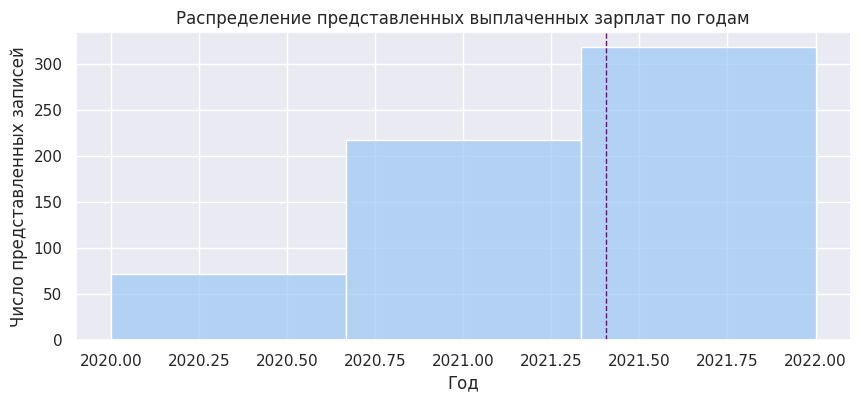

In [13]:
fig, axes = plt.subplots(1, 1, figsize=(10, 4))
sns.histplot(data['work_year'], ax=axes, bins=3)
axes.set(xlabel='Год', ylabel='Число представленных записей');
axes.set_title('Распределение представленных выплаченных зарплат по годам');
axes.axvline(data['work_year'].mean(), color='purple', linestyle='--', linewidth=1);

Как видно из полученной гистограммы, наибольшее число представленных записей о зарплатах касаются 2022 года, чуть меньше - 2021 года и наименьшее их число фиксируется в 2020 году. Поскольку число записей, датированных 2022 годом - наибольшее, можно сделать вывод о том, что они в большей степени повлияли на формирование средней заработной платы по датасету.

#### График для столбца salary_in_usd

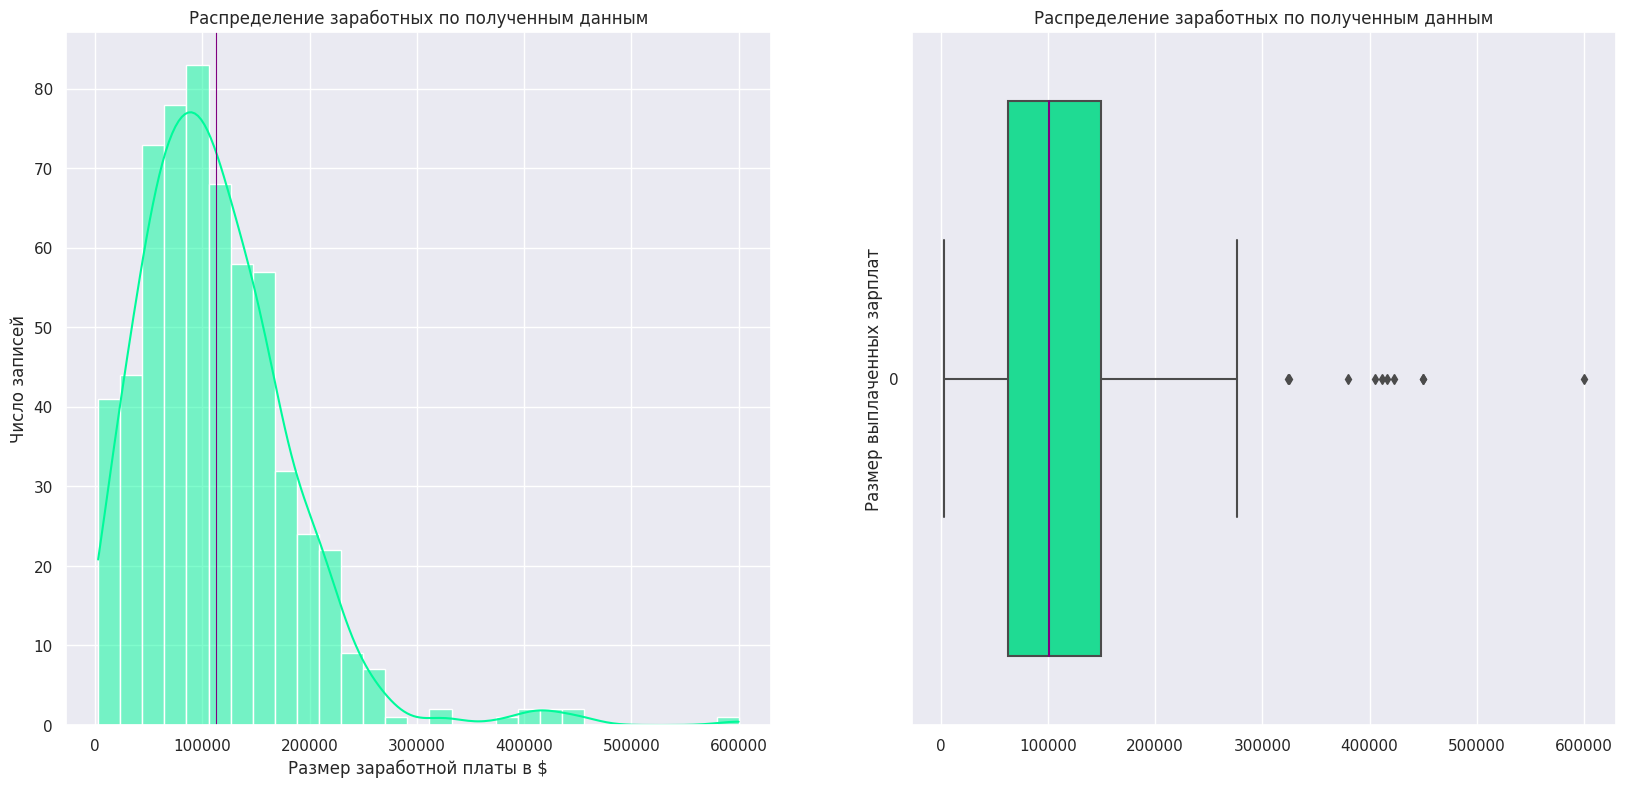

In [14]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 9))

sns.histplot(data['salary_in_usd'], kde=True, ax=axes[0], color='mediumspringgreen');
axes[0].set(xlabel='Размер заработной платы в $', ylabel='Число записей');
axes[0].set_title('Распределение заработных по полученным данным');
axes[0].axvline(data['salary_in_usd'].mean(), color='purple', linestyle='-', linewidth=0.8);

sns.boxplot(data['salary_in_usd'], ax=axes[1], orient='h', color='mediumspringgreen', medianprops={"color": "purple", "linestyle": '-'});
axes[1].set(ylabel='Размер выплаченных зарплат');
axes[1].set_title('Распределение заработных по полученным данным');


После построения гистограммы, а также коробчатой диаграммы по представленным данным, сразу стали ясны некоторые закономерности. Так, например, нам стало ясно, что в наших данный присутствуют записи с значением выплаченной зарплаты от 0 (факический минимум ~ 2800) до 600.000 долларов.

По коробчатой диаграмме удалось определить, что значения свыше 280.000 долларов встречаются достаточно редко и их можно отнести к выбросам. В основном записи содержат данные о заработной плате от 0 до 300.000 долларов, а медианой является значение примерно в 100.000 долларов.

Также, судя по телу коробчатой диаграммы, наиболее частовыплачиваемая зарплата лежит в диапазоне от ~ 80 до 150 тыс. долларов.

Для дополнительного понимания распределения зарплат, построим диаграммы распределения средней заработной платы по опыту работы (experience_level), а также диаграммы заработных плат для специалистов Data Science в разрезе нескольких лет, а также зарплаты для данного направления в компаниях разных размеров.


#### Распределение заработных плат по опыту работы

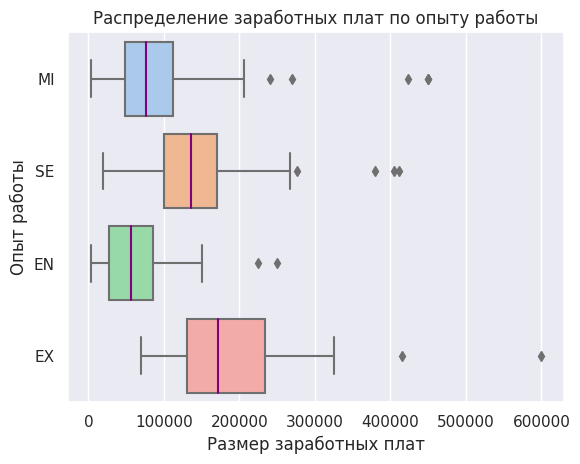

In [15]:
ax = sns.boxplot(x=data['salary_in_usd'], y=data['experience_level'], medianprops={"color": "purple", "linestyle": '-'});
ax.set(xlabel='Размер заработных плат', ylabel='Опыт работы');
ax.set_title('Распределение заработных плат по опыту работы');


По полученным диаграммам мы можем судить об изменениях заработной платы в зависимости от опыта работы.

Для уровня EN (Entry-level/Junior) мы имеем наименьшее тело коробчатой диаграммы, а также наименьшее среднее значение относительно других уроней опыта. Значение заработной платы варьируются от 0 до примерно 150.000 долларов, при этом наибольшее число вакансий лежит в диапазоне зарплат от 30 до 80 тыс. долларов. Медиана лежит на значении, примерно в 60 тыс. долларов.

Для среднего уровня MI (Mid-level/Intermediate) коробчатая диаграмма приобретает более вытянутый вид. Максимальное значение зарплаты для данного уровня пробивает порог в 200 тыс. долларов, а наибольшее число записей лежит в диапазоне от 60 до 110 тыс. долларов. Медиана лежит на уровне примерно в 80 тыс. долларов.

Для высокого уровня экспертности SE (Senior-level/Expert) распределение заработных плат обладает некоторыми свойствами, которыми не обладали распределения для двух предыдущих уровней. Так, например, левый ус диаграммы больше не лежит в районе 0, а смещается на значение в примерно 20 тыс. долларов. Медианная зарплата для работников данного уровня лежит на значении в 130 тыс. долларов, а наибольшее число вакансий принадлежит промежутку от 100 до 170 тыс. долларов.

Для уровня управляющего EX (Executive-level/Director), коробчатая диаграмма представляет собой значение с медианой в 170 тыс. долларов. Нижнее значение лежит на отметке в 80 тыс. долларов, а максимум - на отметке более 300 тыс. долларов. Также именно на данном уровне встречается значение в 600.000 долларов, которое можно было бы отнести к выбросам, если бы не информация о том, что собранные данные относятся к реальным зарплатам в реальных компаниях.

Как видно по проведенному анализу с ростом опыта работы пропорционально растет и заработная плата.

#### Диаграмма распределения заработных плат в зависимости от года, для специалистов Data Science

In [16]:
# выделим из наших данных информацию о специалистах Data Science
data_ds = data[data['job_title'] == 'Data Scientist']

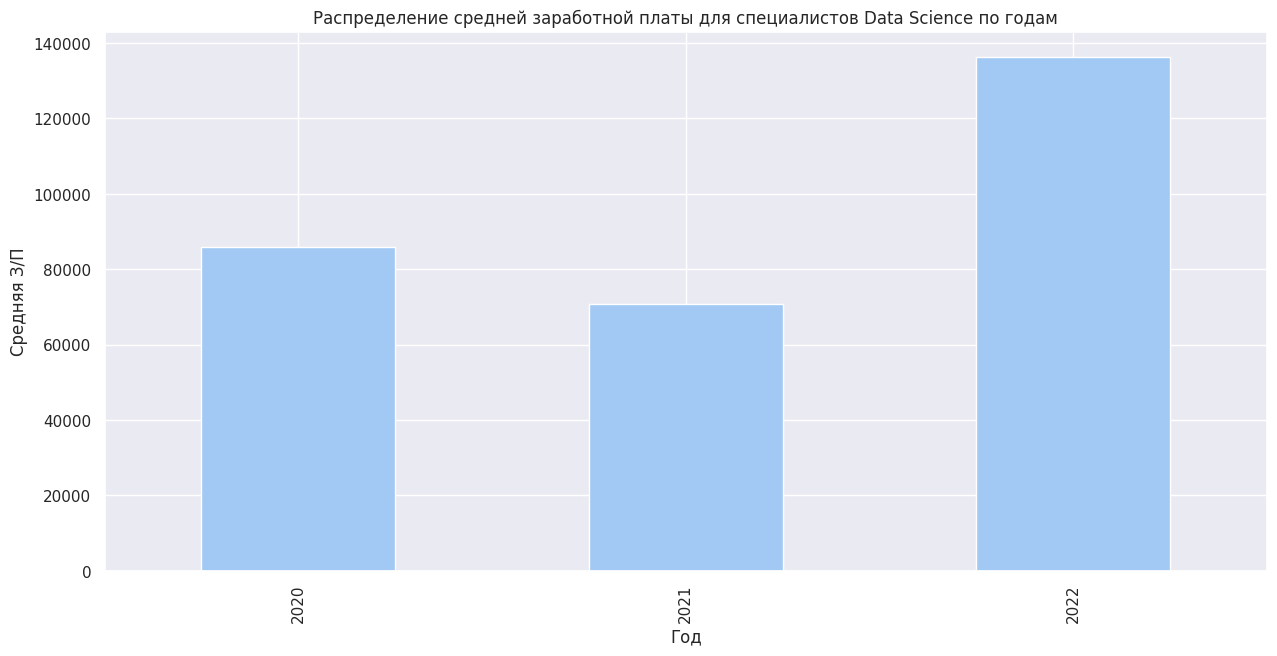

In [17]:
data_ds_distrib = data_ds.groupby('work_year')['salary_in_usd'].mean()
data_ds_distrib.plot(kind='bar',
  figsize=(15,7),
  xlabel='Год',
  ylabel='Средняя З/П',
  title='Распределение средней заработной платы для специалистов Data Science по годам');


Как видно из построенной диаграммы зарплата специалистов Data Science упала в 2021 году, а затем возросла в 2022 году. Так среднее значение заработной платы в 2020 году составляет примерно 84000 долларов, 70000 долларов в 2021 году и почти 140000 долларов в 2022 году.

#### 2. Построим графики для категориальных признаков

Среди представленных категориальных признаков есть как те, в который есть четкое небольшое количество групп, так и те, количество уникальных значений в которых достаточно высоко. Для удобства, среди тех категориальных признаков, количество уникальных значений в которых более 10, мы будем строить диаграммы только для наиболее частовстречающихся 10 уникальных значений.

Список категориальных признаков:
1. experience_level
2. employment_type
3. job_title
4. company_location
5. company_size

#### Диаграмма распределения количетсва записей для признака experience_level

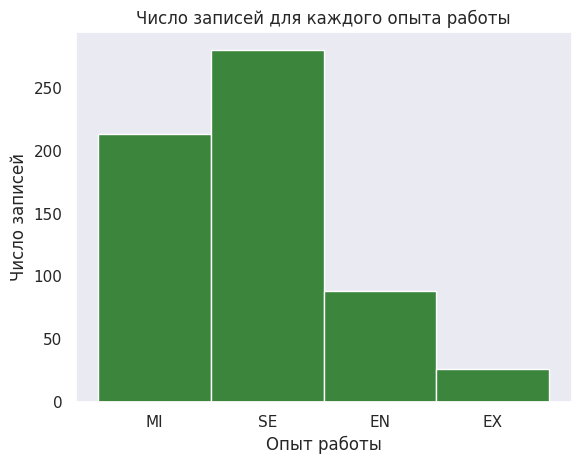

In [18]:
ax = sns.histplot(data=data['experience_level'], color='darkgreen')
ax.set_title('Число записей для каждого опыта работы');
ax.set_xlabel('Опыт работы');
ax.set_ylabel('Число записей');
ax.grid(False);

#### Диаграмма распределения количетсва записей для признака employment_type

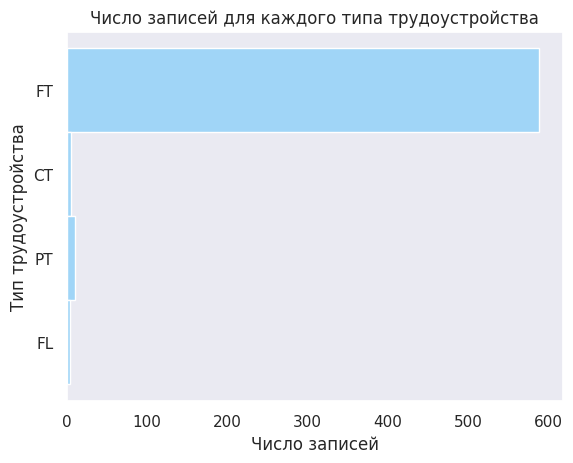

In [19]:
ax = sns.histplot(y=data['employment_type'], color='lightskyblue')
ax.set_title('Число записей для каждого типа трудоустройства');
ax.set_xlabel('Число записей');
ax.set_ylabel('Тип трудоустройства');
ax.grid(False);

#### Диаграмма распределения количества записей для признака job_title




In [20]:
data_job = data['job_title'].value_counts()[:10]

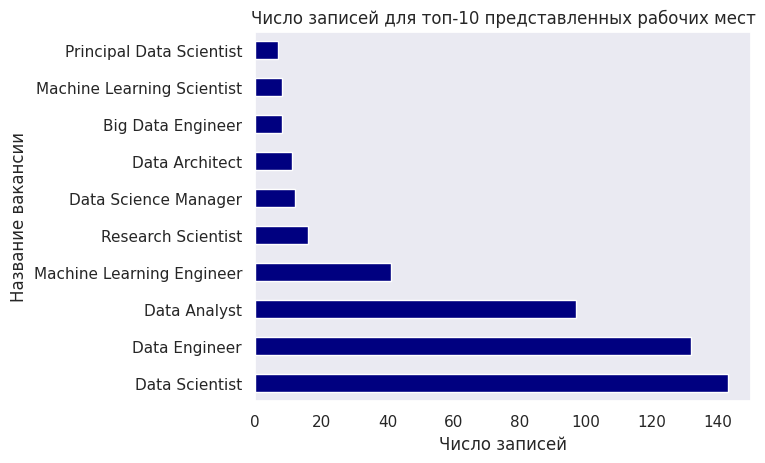

In [21]:
data_job.plot(kind='barh',
                   colormap='gist_ncar',
                   xlabel='Число записей',
                   ylabel='Название вакансии',
                   title = 'Число записей для топ-10 представленных рабочих мест',
                   grid=False
                   );


#### Диаграмма распределения для признака company_location

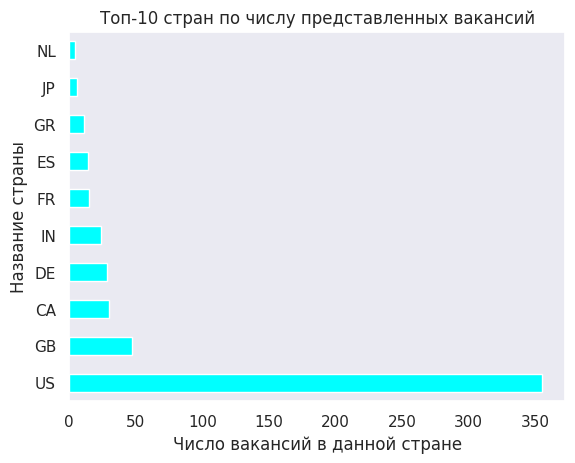

In [22]:
data_countries = data['company_location'].value_counts()[:10]
data_countries.plot(kind='barh',
                   colormap='cool',
                   xlabel='Число вакансий в данной стране',
                   ylabel='Название страны',
                   title = 'Топ-10 стран по числу представленных вакансий',
                   grid=False
                   );


#### Диаграмма распределения для признака company_size

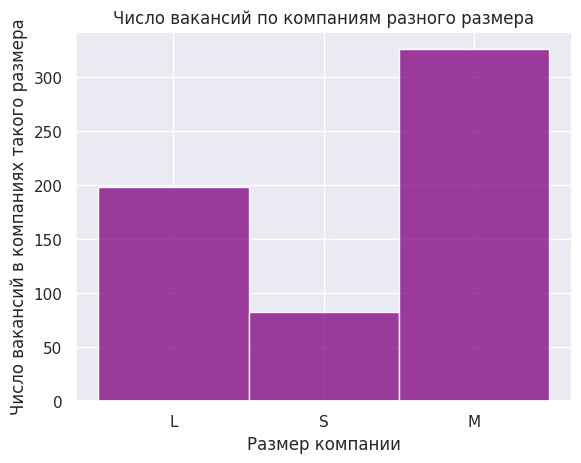

In [23]:
ax = sns.histplot(x=data['company_size'], color='purple')
ax.set_title('Число вакансий по компаниям разного размера');
ax.set_xlabel('Размер компании');
ax.set_ylabel('Число вакансий в компаниях такого размера');

#### Проведем дополнительный корреляционный анализ данных

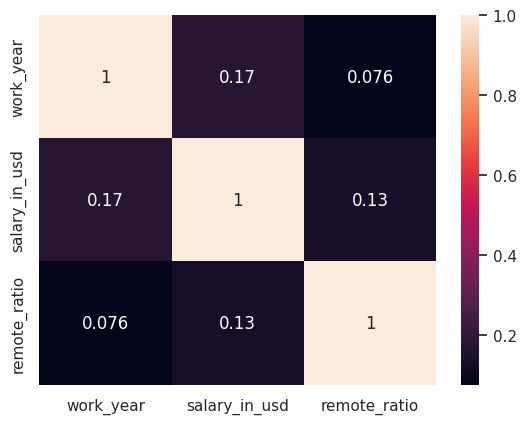

In [24]:
sns.heatmap(data.corr(numeric_only=True), annot=True);

Как видно среди оставшихся признаков не осталось сильной корреляционной зависимости, значет нет необходимости удалять какие либо из оставшихся признаков из датасета.

__Вывод по визуальному анализу данных__

После проведения визуального анализа данных стали понятны некоторые закономерности, так, например, зарплата зависит от года, в котором была сделана запись о вакансии (прямой зависимости тут нет из-за просадки в 2021 году), также отслеживается зависимость зарплаты от уровня работника. Так Junior-специалист получает меньше, чем Middle специалист, который в свою очередь получает меньше, чем работник Senior-уровня. Наибольшее число вакансий представлены как вакансии, требующие от работника полного рабочего дня, а также более половины вакансий относятся к США, из чего можно сделать вывод о влиянии типа занятости и страны, в которой работает Data Scientist, на размер зарплаты.

### Статистический анализ данных

Добавим две функции, упрощающие нам проведение статистического анализа данных

In [25]:
# функция, помогающая определить распределены ли данные нормально
def definition_of_normality(p):
    print('p-value = {:.3f}'.format(p))
    if p <= alpha:
        print('p-значение меньше, чем заданный уровень значимости {:.2f}. Распределение отлично от нормального'.format(alpha), end='\n')
    else:
        print('p-значение больше, чем заданный уровень значимости {:.2f}. Распределение является нормальным'.format(alpha), end='\n')


# функция, помогающая определить отвергаем ли мы нулевую гипотезу
def decision_hypothesis(p):
    print('p-value = {:.3f}'.format(p))
    if p <= alpha:
        print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу в пользу альтернативной.'.format(alpha), end='\n')
    else:
        print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha), end='\n')

#### Бизнес-вопрос 1: Наблюдается ли ежегодный рост зарплат у специалистов Data Scientist?

##### Построим нулевую и альтернативную гипотезы

*Нулевая гипотеза ($H_0$):* зарплаты специалистов Data Science за представленные годы - 2020 ($μ_1$), 2021 ($μ_2$) и 2022 ($μ_3$) - не менялись.

$$ μ_1 = μ_2 = μ_3 $$

*Альтернативная гипотеза ($H_1$):* зарплаты специалистов Data Science за представленные годы - 2020 ($μ_1$), 2021 ($μ_2$) и 2022 ($μ_3$) - изменялись.

$$ μ_1 ≠ μ_2 ≠ μ_3 $$



In [26]:
data_sc = data[data['job_title'] == 'Data Scientist']

data20 = data_sc.loc[data_sc['work_year'] == 2020, 'salary_in_usd']
data21 = data_sc.loc[data_sc['work_year'] == 2021, 'salary_in_usd']
data22 = data_sc.loc[data_sc['work_year'] == 2022, 'salary_in_usd']

# Проверем распределены ли признаки по нормальному закону, используя тесты Шапиро-Уилка
print('Для зарплат за 2020 год:')
result = stats.shapiro(data20)
definition_of_normality(result[1])

print('Для зарплат за 2021 год:')
result = stats.shapiro(data21)
definition_of_normality(result[1])

print('Для зарплат за 2022 год:')
result = stats.shapiro(data22)
definition_of_normality(result[1])

Для зарплат за 2020 год:
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального
Для зарплат за 2021 год:
p-value = 0.125
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным
Для зарплат за 2022 год:
p-value = 0.327
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным


Как видно, распределение в одной группе отлично от нормального, следовательно будем использовать метод __Краскела-Уоллиса__

In [27]:
_, p = stats.kruskal(data20, data21, data22)
decision_hypothesis(p)

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


#####Вывод по Бизнес-вопросу 1
После проведения статистических тестов выяснилось, что среднее значение заработных плат для специалистов Data Scientist по годам было различно. Также с помощью визуализации удалось установить, что средняя заработная плата в 2021 году была ниже, чем в 2020 году, однако в 2022 году значение средней заработной платы выросло как относительно значения 2020, так и относительно значения 2021 годов. Следовательно можно сказать, что в рамках трех лет наблюдается рост средней заработной платы для специалиста Data Scientist.

####Бизнес-вопрос 2: Как соотносятся зарплаты Data Scientist и Data Engineer в 2022 году?

##### Построим нулевую и альтернативную гипотезу

*Нулевая гипотеза ($H_0$):* за 2022 год зарплата специалистов Data Scientist ($μ_1$) была меньше или равна зарплате специалистов Data Engineer ($μ_2$).

$$ μ_1 <= μ_2 $$

*Альтернативная гипотеза ($H_1$):* за 2022 год зарплата специалистов Data Scientist ($μ_1$) была больше зарплаты специалистов Data Engineer ($μ_2$).

$$ μ_1 > μ_2 $$

In [28]:
question2 = data[data['work_year'] == 2022]
data_ds = question2.loc[question2['job_title'] == 'Data Scientist', 'salary_in_usd']
data_de = question2.loc[question2['job_title'] == 'Data Engineer', 'salary_in_usd']

# Проверем распределены ли признаки по нормальному закону, используя тесты Шапиро-Уилка
print('Для специалистов Data Scientist:')
result = stats.shapiro(data_ds)
definition_of_normality(result[1])

print('Для специалистов Data Engineer:')
result = stats.shapiro(data_de)
definition_of_normality(result[1])

Для специалистов Data Scientist:
p-value = 0.327
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным
Для специалистов Data Engineer:
p-value = 0.010
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального


Как видно распределение в одной из групп отлично от нормального, также группы являются независимыми, следовательно будем использовать метод __U-критерий Манна-Уитни__

In [29]:
# проведем тест
_, p = stats.mannwhitneyu(data_ds, data_de, alternative='greater')
decision_hypothesis(p)

p-value = 0.077
p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.


In [30]:
print('Средняя зарплата специалиста Data Scientist {:.2f}'.format(sum(data_ds)))
print('Средняя зарплата специалиста Data Engineer {:.2f}'.format(sum(data_de)))

Средняя зарплата специалиста Data Scientist 10485251.00
Средняя зарплата специалиста Data Engineer 11247437.00


##### Вывод по бизнес-вопросу 2
После проведенного статистического теста у нас нет оснований для отвержения нулевой гипотезы. То есть нельзя сказать, что заработная плата специалиста Data Scientist за 2022 год была выше, чем заработная плата специалиста Data Engineer за этот же год. Также из дополнительного подсчета удалось узнать, что суммарная зарплата, выплаченная всем специалистам Data Engineer за 2022 год, представленным в датасете была равна 11,25 млн. долларов, в то время, как суммарная зарплата у специалистов Data Scientist находилась на отметке 10,5 млн. долларов.

#### Бизнес-вопрос 3: Как соотносятся зарплаты специалистов Data Scientist в компаниях различных размеров?

##### Построим нулевую и альтернативную гипотезу

Так как у нас есть компании трех размеров - S, L и M, то нужно будет построить нулевую и альтернативную гипотезы для трех наборов данных.

*Нулевая гипотеза ($H_0$):* зарплаты специалистов Data Scientist в небольших компаниях ($μ_1$), средних компаниях ($μ_2$) и крупных компаниях ($μ_3$) - одинаковы

$$ μ_1 = μ_2 = μ_3 $$

*Альтернативная гипотеза ($H_1$):* зарплаты специалистов Data Scientist небольших компаниях ($μ_1$), средних компаниях ($μ_2$) и крупных компаниях ($μ_3$) - различны

$$ μ_1 ≠ μ_2 ≠ μ_3 $$


In [31]:
data_scientist = data[data['job_title'] == 'Data Scientist']
ds_small = data_scientist.loc[data_scientist['company_size'] == 'S', 'salary_in_usd']
ds_middle = data_scientist.loc[data_scientist['company_size'] == 'M', 'salary_in_usd']
ds_big = data_scientist.loc[data_scientist['company_size'] == 'L', 'salary_in_usd']

# Проверем распределены ли признаки по нормальному закону, используя тесты Шапиро-Уилка
print('Для небольших компаний:')
result = stats.shapiro(ds_small)
definition_of_normality(result[1])

print('Для средних компаний:')
result = stats.shapiro(ds_middle)
definition_of_normality(result[1])

print('Для больших компаний:')
result = stats.shapiro(ds_big)
definition_of_normality(result[1])


Для небольших компаний:
p-value = 0.189
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным
Для средних компаний:
p-value = 0.639
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным
Для больших компаний:
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального


Перед нами три независимые группы данных, значения в двух из которых распределены нормально, а в третьей - отлично от нормального. Следовательно используем метод __Краскела-Уоллиса__



In [32]:
_, p = stats.kruskal(ds_small, ds_middle, ds_big)
decision_hypothesis(p)

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


##### Вывод по бизнес-вопросу 3
После проведения статистических исследований удалось выяснить, что заработные платы в компаниях разных размеров для специалистов Data Scientist - различны. Более подробные исследования, с целью нахождения размеров компании с наибольшей заработной платой будут проведены в разделе __Дополнительные исследования__

#### Бизнес-вопрос 4: Есть ли связь между наличием должностей Data Scientist и Data Engineer и размером компании?

Поскольку необходимо определить есть ли связь между двумя категориальными признаками - наличием должностей Data Scientist и Data Engineer, а также размером компании - используем критерий __хи-квадрат__.

In [33]:
# Выделим данные только по 2-ум профессиям
data1 = data.copy()
mask1 = data1['job_title'] == 'Data Scientist'
mask2 = data1['job_title'] == 'Data Engineer'
data1 = data1[mask1|mask2]

table = pd.crosstab(data1['job_title'], data1['company_size'])
display(table)

company_size,L,M,S
job_title,,,
Data Engineer,37,89,6
Data Scientist,45,77,21


Как видно по полученной сводной таблице для в мелких компаниях гораздо чаще встречаются специалисты Data Scientist, чем специалисты Data Engineer. Разрыв в числе вакансий примерно в 3,5 раза в пользу специалистов Data Scientist. В компаниях среднего размера чаще встречаются специалисты Data Engineer, а в компаниях больших размеров вновь число специалистов Data Scientist выше, чем число специалистов Data Engineer, однако разница составляет примерно 20%.

##### Построим нулевую и альтернативную гипотезу

*Нулевая гипотеза ($H_0$):* между размером компании и наличием вакансий Data Scientist и Data Engineer - нет связи.

*Альтернативная гипотеза ($H_1$):* между размером компании и наличием вакансий Data Scientist и Data Engineer - есть связь.

In [34]:
# При помощи метода Хи-вадрат узнаем, есть ли зависимость между наличием вакансий и размером компании

_, p, _, _ = stats.chi2_contingency(table)
decision_hypothesis(p)

p-value = 0.008
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


##### Вывод по бизнес-вопросу 4
После проведения статистических тестов удалось выяснить, что существует связь между размером компании и наличием в ней вакансий Data Scientist и Data Engineer. Также следует указать, что по полученным данным, только в компаниях среднего размера число вакансий Data Scientist меньше числа вакансий Data Engineer.

## Шаг 3. Дополнительные исследования и выводы


### Дополнительные исследования


Произведем дополнительные исследования:
1. Узнаем в компаниях каких размеров наибольшая зарплата для специалистов Data Scientist (продолжение исследования бизнес-вопроса 3)
2. Проведем статистические исследования для того чтобы узнать есть ли связь между размерами компании и наличием в ней специалистов Senior и Director - уровней.
3. Узнаем есть ли связь между показателем удаленной работы и заработной платы

#### __Дополнительное исследование 1: в компаниях каких размеров заработная плата у специалистов Data Science наибольшая__



##### Визуальный анализ

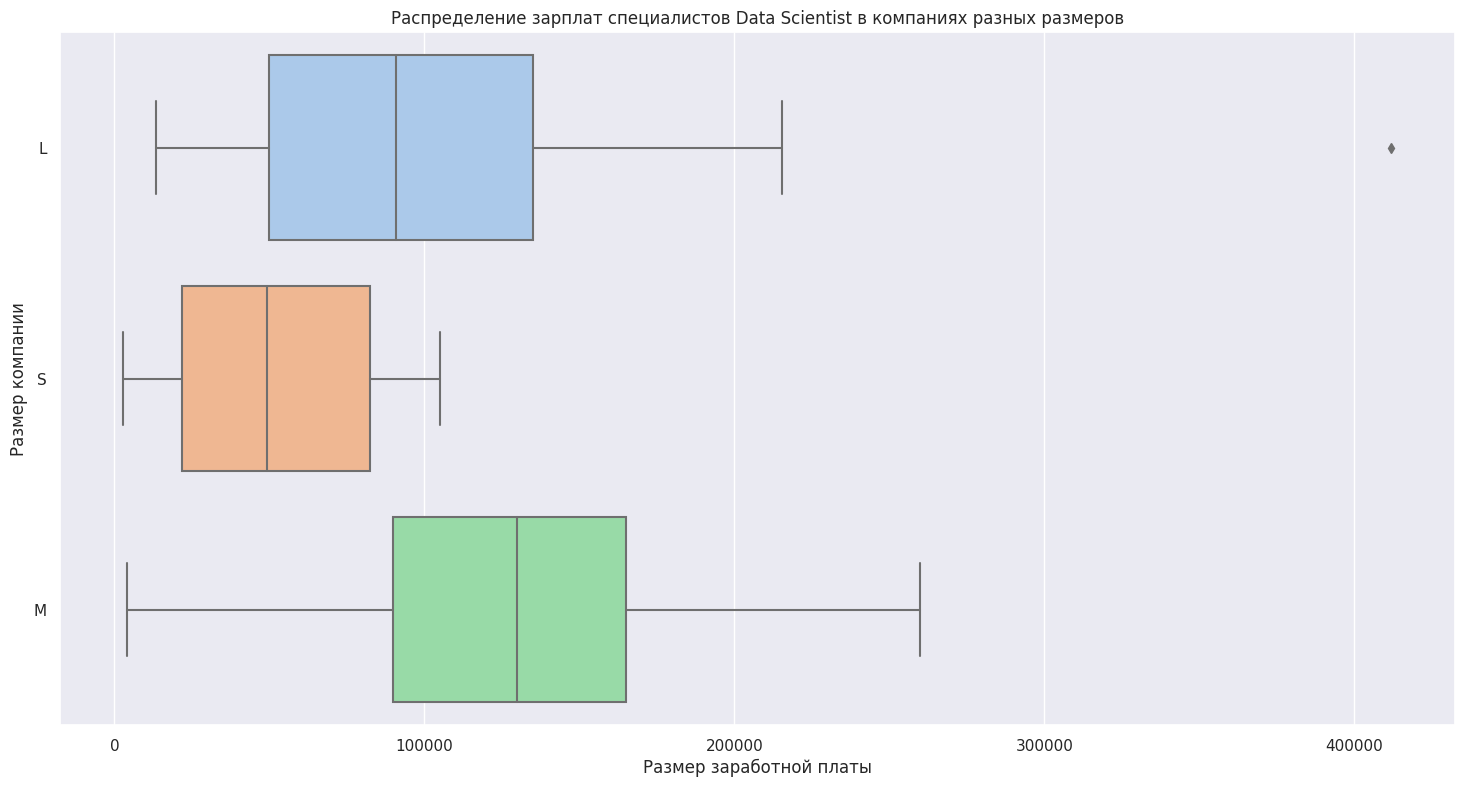

In [35]:
data_ds = data[data['job_title'] == 'Data Scientist']
fig, axes = plt.subplots(figsize=(18, 9))
ax = sns.boxplot(data_ds, x='salary_in_usd', y='company_size', orient='h', ax=axes);
ax.set(xlabel='Размер заработной платы', ylabel='Размер компании');
plt.title('Распределение зарплат специалистов Data Scientist в компаниях разных размеров');

##### Вывод по визуальному анализу
Как видно из визуального анализа наибольшая средняя заработная плата, как и наибольшая верхняя и нижняя граница заработной платы для специалистов Data Scientist присутствует в компаниях среднего размера, то есть в компаниях где работает от 50 до 250 человек. В компаниях большого размера разброс зарплат меньше, также как и среднее значение заработной платы. Также следует заметить, что хотя у компаний среднего размера размер средней заработной платы выше, тем не менее минимальная граница заработной платы выше у работников больших компаний.  

##### Статистический анализ

Проведем два статистических анализа, чтобы понять в компании какого размера наибольшая заработная плата для специалистов Data Science.

##### Построим нулевую и альтернативную гипотезы для первого тестирования

*Нулевая гипотеза ($H_0$):* зарплата специалистов Data Science в __мелких__ компаниях ($μ_1$) больше, или равна заработной плате специалистов Data Science в __средних__ компаниях ($μ_2$).

$$ μ_1 >= μ_2 $$

*Альтернативная гипотеза ($H_1$):* зарплаты специалистов Data Science в __мелких__ компаниях меньше, чем заработная плата специалистов Data Science в __средних__ компаниях.

$$ μ_1 < μ_2 $$


In [36]:
data_ds_small = data_ds.loc[data_ds['company_size'] == 'S', 'salary_in_usd']
data_ds_middle = data_ds.loc[data_ds['company_size'] == 'M', 'salary_in_usd']

# проводим тест Шапиро-Уилка
print('Для значений З/П в мелких компаниях')
result = stats.shapiro(data_ds_small)
definition_of_normality(result[1])

print('Для значений З/П в средних компаниях')
result = stats.shapiro(data_ds_middle)
definition_of_normality(result[1])

Для значений З/П в мелких компаниях
p-value = 0.189
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным
Для значений З/П в средних компаниях
p-value = 0.639
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным


Оба распределения являются нормальными. У нас есть две независимые группы, распределенные нормально, следовательно будем использовать __Двухвыборочный t-критерий__. Поскольку перед нами двухвыборочный t-критерий нужно проверить равны ли дисперсии в группах.



In [37]:
print('Тест на равенство дисперсий')
result = stats.levene(data_ds_small, data_ds_middle)
p = result[1]
print('p-value = {:.3f}'.format(p))

if p <= alpha:
    print('Дисперсии не одинаковы, в stats.ttest_ind нужно использовать параметр equal_var=False.')
else:
    print('Дисперсии одинаковы, в stats.ttest_ind нужно использовать параметр equal_var=True.')

Тест на равенство дисперсий
p-value = 0.025
Дисперсии не одинаковы, в stats.ttest_ind нужно использовать параметр equal_var=False.


In [38]:
# проводим тест на сравнение средних в группах
print('Тест на равенство средних')
_, p = stats.ttest_ind(data_ds_small, data_ds_middle, alternative='less', equal_var=False)
decision_hypothesis(p)

Тест на равенство средних
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


После первого теста удалось выяснить, что заработная плата специалистов Data Science в средних компаниях выше, чем заработная плата тех же специалистов в мелких компаниях.

##### Построим нулевую и альтернативную гипотезы для второго тестирования

*Нулевая гипотеза ($H_0$):* зарплата специалистов Data Science в __средних__ компаниях ($μ_1$) больше, или равна заработной плате специалистов Data Science в __больших__ компаниях ($μ_2$).

$$ μ_1 >= μ_2 $$

*Альтернативная гипотеза ($H_1$):* зарплаты специалистов Data Science в __средних__ компаниях меньше, чем заработная плата специалистов Data Science в __больших__ компаниях.

$$ μ_1 < μ_2 $$

In [39]:
data_ds_middle = data_ds.loc[data_ds['company_size'] == 'M', 'salary_in_usd']
data_ds_big = data_ds.loc[data_ds['company_size'] == 'L', 'salary_in_usd']

# проводим тест Шапиро-Уилка
print('Для значений З/П в средних компаниях')
result = stats.shapiro(data_ds_middle)
definition_of_normality(result[1])

print('Для значений З/П в больших компаниях')
result = stats.shapiro(data_ds_big)
definition_of_normality(result[1])

Для значений З/П в средних компаниях
p-value = 0.639
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным
Для значений З/П в больших компаниях
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального


Перед нами два набора независимых данных, распределение одного набора данных - нормальное, а второго - отлично от нормального, следовательно используем __U-Критерий Манна-Уитни__

In [40]:
_, p = stats.mannwhitneyu(data_ds_middle, data_ds_big, alternative='less')
decision_hypothesis(p)

p-value = 0.994
p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.


После проведения второго статистического анализа удалось узнать, что заработная плата специалиста Data Scientist в средних компаниях больше, или равна заработной плате этого же специалиста в большой компании.

##### Вывод по дополнительному исследованию 1
На основании проведенных тестов, как визуальных, так и статистических удалось узнать, что наибольшую среднюю заработную плату, а также наибольшую верхнюю границу заработной платы соискатель может найти в компаниях среднего размера.

#### __Дополнительное исследование 2: есть ли связь между размером компании и наличием в ней специалистов уровней Senior и Director__

##### Визуальный анализ

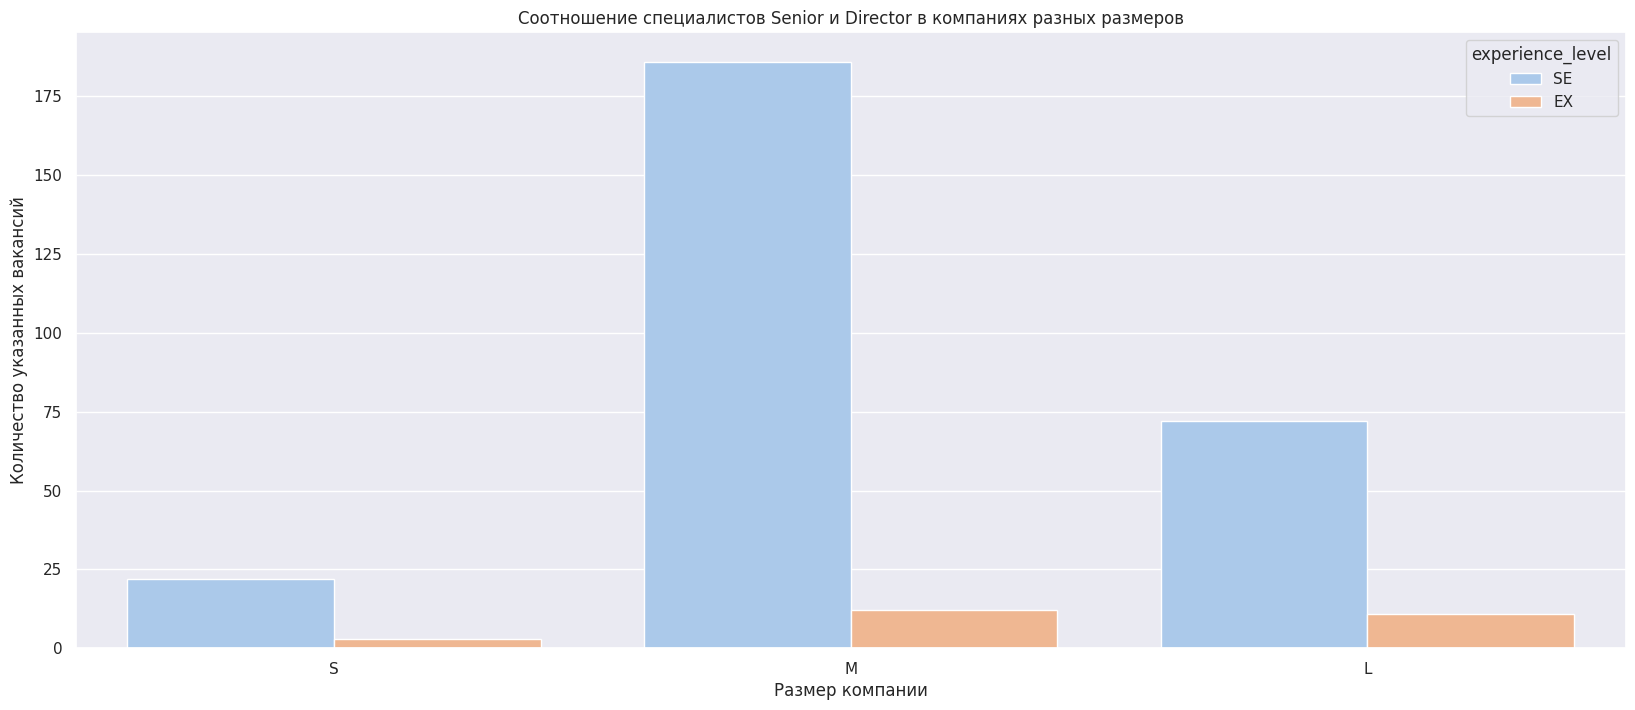

In [41]:
mask1 = data['experience_level'] == 'SE'
mask2 = data['experience_level'] == 'EX'
data_dop2 = data[(mask1 | mask2)]

fig, axes = plt.subplots(figsize=(20, 8))
ax = sns.countplot(data=data_dop2, x=data_dop2['company_size'], hue='experience_level', ax=axes)
ax.set(xlabel='Размер компании', ylabel='Количество указанных вакансий');
plt.title('Соотношение специалистов Senior и Director в компаниях разных размеров');
plt.show();

##### Вывод по визуальному анализу
После проведения визуального анализа можно построить предположение о том, что число специалистов уровня Director в компаниях среднего уровня больше, чем подобных специалистов в больших компаниях. Также можно предположить, что количество специалистов двух искомых уровней действительно зависит от размера компании. Однако для уточнения проведем статистические исследования.



##### Статистический анализ

##### Построим нулевую и альтернативную гипотезы для тестирования

*Нулевая гипотеза ($H_0$):* __отсутствует__ связь между размером компании и наличием в ней специалистов уровней Senior и Diretor

*Альтернативная гипотеза ($H_1$):* связь между размером компании и наличием в ней специалистов уровней Senior и Diretor __присутствует__

In [42]:
table = pd.crosstab(data['experience_level'], data['company_size'])
_, p, _, _ = stats.chi2_contingency(table)
decision_hypothesis(p)

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


##### Вывод по статистическому анализу
После проведения визуального, а также статистического анализов удалось убедиться в том, что наличие должностей уровня Senior и Director зависят от размера компании. Так в компаниях среднего размера наблюдается максимальное число должностей с такими уровнями опыта.

#### __Дополнительное исследование 3: есть ли связь между показателем удаленной работы и заработной платы__

##### Визуальный анализ данных

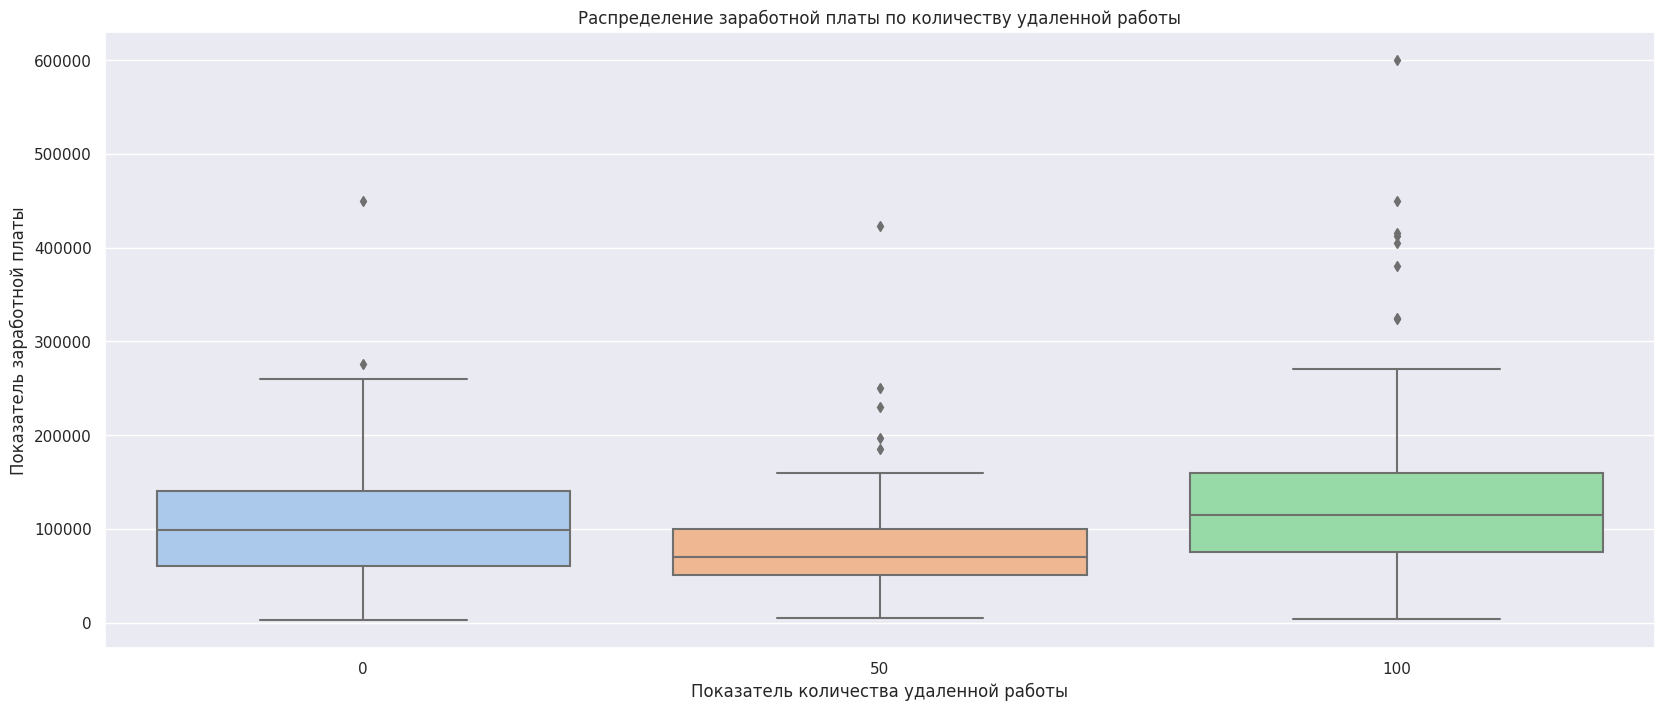

In [43]:
fig, axes = plt.subplots(figsize=(20,  8))
pict = sns.boxplot(data, x='remote_ratio', y='salary_in_usd');
pict.set(xlabel='Показатель количества удаленной работы', ylabel='Показатель заработной платы');
plt.title('Распределение заработной платы по количеству удаленной работы');
plt.show();

##### Вывод по визуальному анализу
Как видно из полученных коробчатых диаграмм наименьшее среднее значение заработной платы наблюдается для вакансии с частично удаленной работой. Рабочее место без удаленной работы дает возможность работнику получать большее число денег, чем работнику с частично удаленной работой. Самый лучший показатель средней заработной платы, а также разброса заработных плат наблюдается у тех работников, которые находятся на полностью удаленной работе.

##### Статистический анализ данных

##### Построим нулевую и альтернативную гипотезы для тестирования

*Нулевая гипотеза ($H_0$):* зарплата специалистов работающих в офисе ($μ_1$), на частично удаленной работе ($μ_2$) и на полностью удаленной работе ($μ_3$) - идентична.

$$ μ_1 = μ_2 = μ_3 $$

*Альтернативная гипотеза ($H_1$):* зарплаты специалистов работающих в офисе ($μ_1$), на частично удаленной работе ($μ_2$) и на полностью удаленной работе ($μ_3$) - различны.

$$ μ_1 ≠ μ_2 ≠ μ_3 $$



In [44]:
data_office = data.loc[data['remote_ratio'] == 0, 'salary_in_usd']
data_part = data.loc[data['remote_ratio'] == 50, 'salary_in_usd']
data_distance = data.loc[data['remote_ratio'] == 100, 'salary_in_usd']

# Проверим данные на нормальность
print('Для показателя remote_ratio = 0')
result = stats.shapiro(data_office)
definition_of_normality(result[1])

print('Для показателя remote_ratio = 50')
result = stats.shapiro(data_part)
definition_of_normality(result[1])

print('Для показателя remote_ratio = 100')
result = stats.shapiro(data_distance)
definition_of_normality(result[1])


Для показателя remote_ratio = 0
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального
Для показателя remote_ratio = 50
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального
Для показателя remote_ratio = 100
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального


Перед нами три независимых признака, распределение которых отлично от нормального. Для проведения статистического теста используем __Критерий Краскела-Уоллиса__

In [45]:
_, p = stats.kruskal(data_office, data_part, data_distance)
decision_hypothesis(p)

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


##### Выводы по статистическому анализу
На основании проведенного статистического теста удалось выяснить, что заработные платы специалистов работающих в офисе, при совмещенном графике работы, а также на полностью удаленной работе - различны. Те, кто работают на полностью удаленной работе получают больше чем те, кто работает в офисе, которые в свою очередь получают больше, чем люди, работающие при совмещенном графике работы.

### Итоговый вывод по анализу

В ходе проведения анализа предоставленного с вакансиями датасета удалось узнать некоторые важные подробности, которые могут представлять интерес для представителей HR-агенства. Можно сказать, что средний специалист работающий в сфере Data Science в 2020-2022 годах зарабатывал в среднем 100.000 долларов в год. Наибольшее число вакансий предлагают компании среднего размера с числом работников от 51 до 250 человек. Также именно в компаниях среднего размера наблюдается максимальное число работников уровня Senior и Director, а также наибольшее значение их заработных плат. Также в 2020-2022 годах фокус работодателей сместился на онлайн рынок, так средний специалист работающий удаленно получает больше своего коллеги, работающего в офисе. Если компания желает найти специалиста, или если специалист желает найти рабочее место, то лучше всего обратить внимание на вакансии с названием "Data Scientis" или "Data Engineer", так как именно эти соискатели имеют наибольший шанс найти работу и трудоустроиться на хорошую заработную плату.